In [1]:
import FunctionsLibrary as fn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the data
cancer = load_breast_cancer()
X = cancer.data[:,:24]
y = cancer.target
X = (X -np.mean(X))/np.sqrt(np.var(X))
Y = fn.to_categorical_numpy(y)


In [3]:
n_categories = Y.shape[1]
n_features = X.shape[1]
print("Number of categories:", n_categories)
print("Number of features:", n_features)

Number of categories: 2
Number of features: 24


In [4]:
hidden_layers = [('relu',0),('relu',0.01),'softmax']
layer_dims=[n_features,6,4,n_categories]
NNclassifier = fn.NN(layer_dims=layer_dims,hidden_layers=hidden_layers , cost_function="CrossEntropy", optimization_method = "Adam",
           batch_size = 32, max_epoch=300, verbose=1, learning_rate=0.1)

In [5]:
NNclassifier.fit(X.T,Y.T)

Initilizing Weights...
Starting Training...
Cost function after epoch 30: 0.21616390335262736
Cost function after epoch 60: 0.1746994981913677
Cost function after epoch 90: 0.14210128179439163
Cost function after epoch 120: 0.16277332001104577
Cost function after epoch 150: 0.1295974410402348
Cost function after epoch 180: 0.11616244488438958
Cost function after epoch 210: 0.12634655434107753
Cost function after epoch 240: 0.12719957574598767
Cost function after epoch 270: 0.1271092228570983
Cost function after epoch 300: 0.13854477807915855


In [6]:
Y_tilde = NNclassifier.predict(X.T)
Y_pred = NNclassifier.predict(X.T)

Text(0, 0.5, 'Cost/loss')

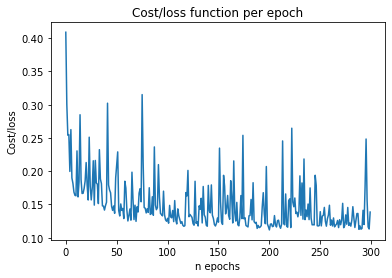

In [7]:
plt.plot(NNclassifier.costs)
plt.title("Cost/loss function per epoch")
plt.xlabel("n epochs")
plt.ylabel("Cost/loss")

Text(0, 0.5, 'Accuracy')

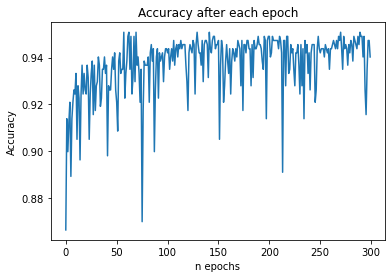

In [8]:
plt.plot(NNclassifier.acc)
plt.title("Accuracy after each epoch")
plt.xlabel("n epochs")
plt.ylabel("Accuracy")

In [9]:
fn.accuracy(Y, np.argmax(Y_tilde, axis=0))

0.9402460456942003

# Loading the MNISt data base
## There are 1797 images of size 8x8 pixels in "grayscale"

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


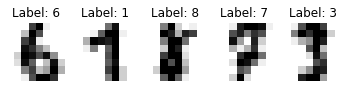

In [10]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)


for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()


In [11]:
X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [12]:
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

## Setting up the NN for classification

In [40]:
hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]

NNclassifier = fn.NN(layer_dims=layer_dims, 
                     hidden_layers=hidden_layers, 
                     cost_function='CrossEntropy',
                     optimization_method = "SGDM",
                     batch_size = 32, 
                     max_epoch=100, 
                     penalty="l2",
                     lamb=0,
                     verbose=1, 
                     learning_rate=0.05)

In [41]:
NNclassifier.fit(X_train, Y_train)

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 1.0142617321206109
Cost function after epoch 20: 0.3333121545481434
Cost function after epoch 30: 0.15968160340458634
Cost function after epoch 40: 0.15218135600341742
Cost function after epoch 50: 0.08385090050654508
Cost function after epoch 60: 0.07610368961131667
Cost function after epoch 70: 0.02889495169654587
Cost function after epoch 80: 0.0801190589727086
Cost function after epoch 90: 0.03979899821021844
Cost function after epoch 100: 0.01523778965995464


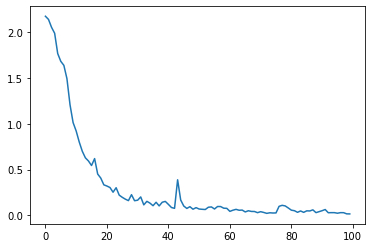

In [42]:
plt.plot(NNclassifier.costs)


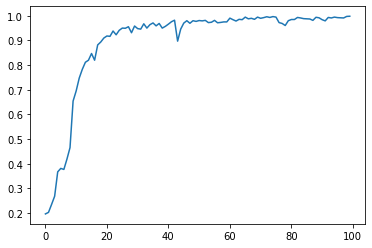

In [43]:
plt.plot(NNclassifier.acc)

In [44]:
Y_tilde = NNclassifier.predict(X_train)
Y_pred = NNclassifier.predict(X_test)

In [45]:
NN_train_acc = fn.accuracy(Y_train.T, np.argmax(Y_tilde, axis=0))
NN_test_acc = fn.accuracy(Y_test.T, np.argmax(Y_pred, axis=0))
print("NN Training accuracy: ",NN_train_acc )
print("NN Testing accuracy: ",NN_test_acc )

NN Training accuracy:  0.9979123173277662
NN Testing accuracy:  0.9527777777777777


In [103]:
# Looping over different lambdas
lamb_array = np.logspace(-5,1,30)
train_acc = np.zeros(lamb_array.shape)
test_acc = np.zeros(lamb_array.shape)

hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]
for i in range(len(lamb)):
    NNclassifier = fn.NN(layer_dims=layer_dims, 
                         hidden_layers=hidden_layers, 
                         cost_function='CrossEntropy',
                         optimization_method = "SGDM",
                         batch_size = 10, 
                         max_epoch=100, 
                         penalty="l2",
                         lamb=lamb_array[i],
                         verbose=0, 
                         learning_rate=0.05)
    NNclassifier.fit(X_train, Y_train)
    Y_tilde = NNclassifier.predict(X_train)
    Y_pred = NNclassifier.predict(X_test)
    train_acc[i] = fn.accuracy(Y_train.T, np.argmax(Y_tilde, axis=0))
    test_acc[i] = fn.accuracy(Y_test.T, np.argmax(Y_pred, axis=0))
    if train_acc[i] == 0:
        break


C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:501: RuntimeWarning: divide by zero encountered in log
  cost = np.squeeze(-np.sum(np.multiply(np.log(A),Y))/m)
C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:501: RuntimeWarning: invalid value encountered in multiply
  cost = np.squeeze(-np.sum(np.multiply(np.log(A),Y))/m)
C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:420: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(X-C) / np.sum(np.exp(X-C),axis=0)


Text(0.5, 0, 'Penalty Term')

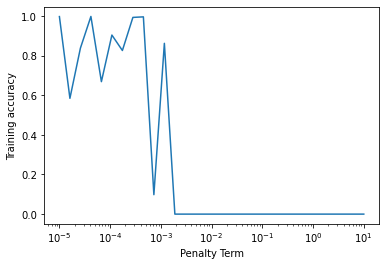

In [104]:
plt.plot(lamb_array, train_acc)
plt.xscale("log")
plt.ylabel("Training accuracy")
plt.xlabel("Penalty Term")

In [108]:
np.argmax(Y_tilde, axis=0)==Y_train

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

Text(0.5, 0, 'Penalty Term')

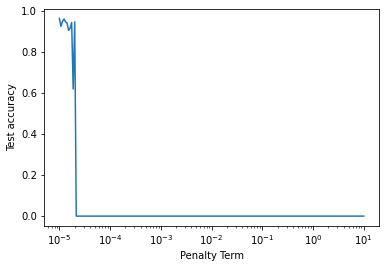

In [75]:
plt.plot(lamb_array, test_acc)
plt.xscale("log")
plt.ylabel("Test accuracy")
plt.xlabel("Penalty Term")

# Logistic regression on the MNIST data

In [ ]:
X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)





## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating the model and fitting the data into the Multi-Class Logistic Regression Classifier

In [ ]:
max_epoch = 100
batch_size = 32
learning_rate = 0.001
MULTI = fn.logisticmulticlass(X, Y, optimizer=["SGD"],
                            learning_rate = learning_rate, 
                            batch_size = batch_size,
                            max_epoch=max_epoch)
MULTI.fit(X_train, Y_train)


In [ ]:
Y_tilde = MULTI.predict(X_train)
Y_pred = MULTI.predict(X_test)

In [ ]:
fn.accuracy(Y_train, np.argmax(Y_tilde.T, axis=0))

In [ ]:
fn.accuracy(Y_test, np.argmax(Y_pred.T, axis=0))

# Testing more intercatively with showing example image and then feeding it into the Neural Network

In [ ]:
# Selecting a figure

In [ ]:
indices = np.arange(len(X_test.T))
entries = 5
random_indices = np.random.choice(indices, size=entries)

testing = X_test.T

for i, img in enumerate(testing[random_indices]):
    plt.subplot(1, entries, i+1)
    plt.axis('off')
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    pred_int = np.argmax(NNclassifier.predict(img.reshape(-1,1)), axis=0)[0]
    label_digit = np.argmax(Y_test[:,random_indices[i]], axis=0)
    plt.title("Label %d \n Prediction: %i" % (label_digit,np.int(pred_int)))
plt.tight_layout()
plt.show()

# Using the same class for regression:

In [ ]:
import FunctionsLibrary as fn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
datapoints  = 100
noisefactor = 0
x, y = np.linspace(0,1,datapoints), np.linspace(0,1,datapoints)
x, y = np.meshgrid(x,y) 
z = fn.FrankeFunction(x,y,noisefactor=noisefactor)

In [ ]:
X = np.array([np.ravel(x), np.ravel(y)])
z = z.reshape(1,datapoints**2) 

n_features = X.shape[0]
n_categories = 1

In [ ]:
NNregression = fn.NN(layer_dims=[X.shape[0],10,10,1], 
                      hidden_layers=["sigmoid","sigmoid","linear"],
                      cost_function="MSE", optimization_method = "Adam",
                      batch_size = 32, max_epoch=500, 
                      verbose=1, learning_rate=0.05)

In [ ]:
NNregression.fit(X,z)

In [ ]:
plt.plot(NNregression.costs)
plt.title("Cost function MSE")
plt.ylabel("0.5 MSE")
plt.xlabel("Epochs")

In [ ]:
z_pred = NNregression.predict(X)

In [ ]:
fn.frankeplot(z_pred.reshape(datapoints,datapoints), "NN prediction on the Franke Function")


In [ ]:
z_pred_surf = z_pred.reshape(datapoints,datapoints)


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z_pred_surf, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

# Labeling the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("NN prediction on the Franke Function", fontsize = 16)
ax.set_zlim(-0.10, 1.40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()